In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

In [21]:
df = pd.read_csv('supermarket_sales new.csv')

In [22]:
df.head()

,Gender,Invoice ID,Branch,City,Customer type,Product line,Unit price,Quantity,Tax 5%
0,Female,750-67-8428,A,Yangon,Member,Health and beauty,74.69,7,261.415
1,Female,226-31-3081,C,Naypyitaw,Normal,Electronic accessories,15.28,5,3.820
2,Female,355-53-5943,A,Yangon,Member,Electronic accessories,68.84,6,20.652
3,Female,315-22-5665,C,Naypyitaw,Normal,Home and lifestyle,73.56,10,36.780
4,Female,665-32-9167,A,Yangon,Member,Health and beauty,36.26,2,3.626


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gender         1000 non-null   object 
 1   Invoice ID     1000 non-null   object 
 2   Branch         1000 non-null   object 
 3   City           1000 non-null   object 
 4   Customer type  1000 non-null   object 
 5   Product line   1000 non-null   object 
 6   Unit price     1000 non-null   float64
 7   Quantity       1000 non-null   int64  
 8   Tax 5%         1000 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 70.4+ KB


In [24]:
df.describe()

,Unit price,Quantity,Tax 5%
count,1000.000000,1000.000000,1000.000000
mean,55.672130,5.510000,43.911392
std,26.494628,2.923431,100.551612
min,10.080000,1.000000,1.066000
25%,32.875000,3.000000,6.222500
50%,55.230000,5.000000,12.404000
75%,77.935000,8.000000,27.226250
max,99.960000,10.000000,985.000000


In [25]:
df.shape

(1000, 9)

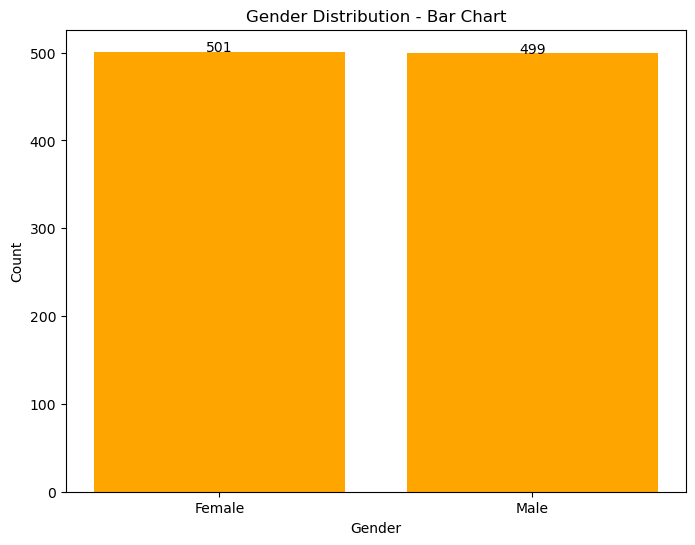

Dropdown(description='Chart Type:', options=('Bar Chart', 'Pie Chart'), value='Bar Chart')

In [37]:
gender_counts = df['Gender'].value_counts()
# Function to plot charts based on selection
def plot_chart(chart_type):
    clear_output(wait=True)  # Clears previous output to avoid stacking charts
    plt.figure(figsize=(8, 6))
    if chart_type == 'Bar Chart':
        plt.bar(gender_counts.index, gender_counts, color='orange')
        for index, value in enumerate(gender_counts):
            plt.text(index, value + 0.5, str(value), ha='center')
        plt.title('Gender Distribution - Bar Chart')
        plt.xlabel('Gender')
        plt.ylabel('Count')
    elif chart_type == 'Pie Chart':
        plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
        plt.title('Gender Distribution - Pie Chart')
    plt.show()
    display(chart_selector)  # Redisplay the widget after clearing

# Dropdown selector widget
chart_selector = widgets.Dropdown(
    options=['Bar Chart', 'Pie Chart'],
    value='Bar Chart',
    description='Chart Type:',
)

# Display the widget and link it to the plotting function
display(chart_selector)
plot_chart(chart_selector.value)
chart_selector.observe(lambda change: plot_chart(chart_selector.value), names='value')

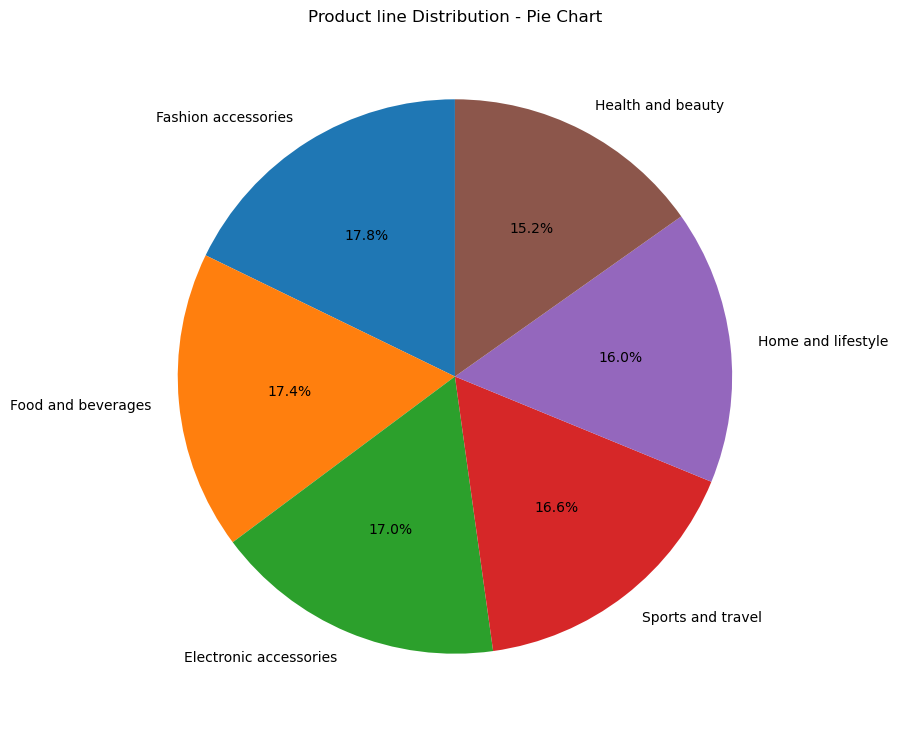

Dropdown(description='Chart Type:', index=1, options=('Bar Chart', 'Pie Chart'), value='Pie Chart')

In [47]:
gender_counts = df['Product line'].value_counts()
# Function to plot charts based on selection
def plot_chart(chart_type):
    clear_output(wait=True)  # Clears previous output to avoid stacking charts
    plt.figure(figsize=(15, 9))
    if chart_type == 'Bar Chart':
        plt.bar(gender_counts.index, gender_counts, color='forestgreen')
        for index, value in enumerate(gender_counts):
            plt.text(index, value + 5, str(value), ha='center')
        plt.title('Product line Distribution - Bar Chart')
        plt.xlabel('Product line')
        plt.ylabel('Count')
    elif chart_type == 'Pie Chart':
        plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
        plt.title('Product line Distribution - Pie Chart')
    plt.show()
    display(chart_selector)  # Redisplay the widget after clearing

# Dropdown selector widget
chart_selector = widgets.Dropdown(
    options=['Bar Chart', 'Pie Chart'],
    value='Bar Chart',
    description='Chart Type:',
)

# Display the widget and link it to the plotting function
display(chart_selector)
plot_chart(chart_selector.value)
chart_selector.observe(lambda change: plot_chart(chart_selector.value), names='value')

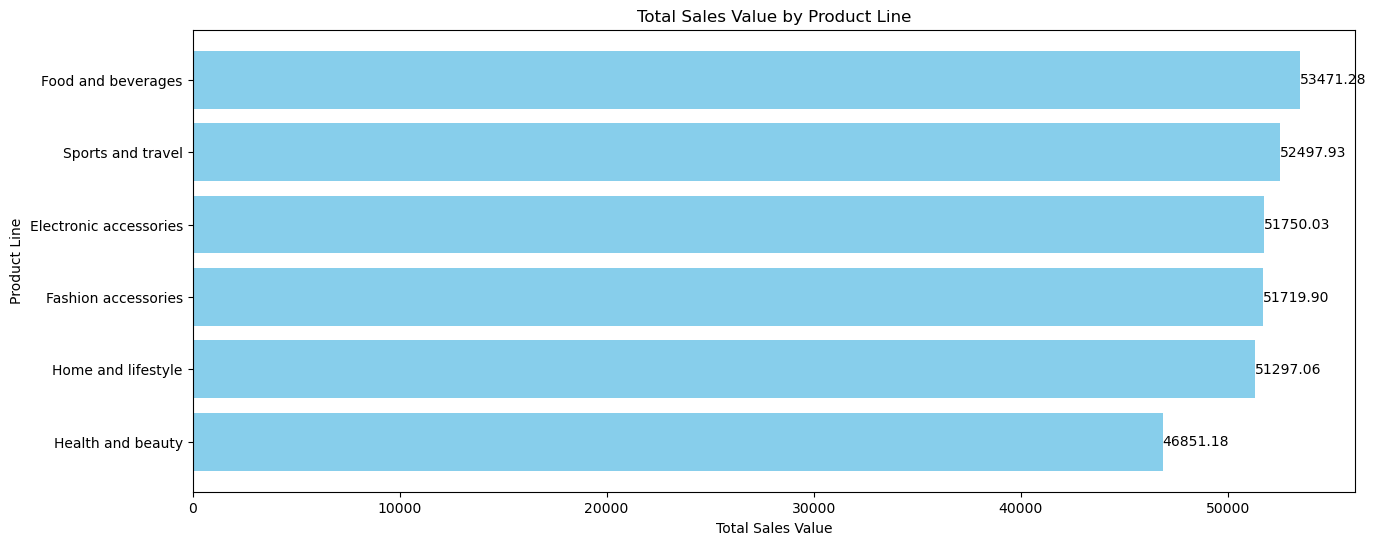

In [57]:
df['Total Value'] = df['Unit price'] * df['Quantity']

# Group by 'Product line' and sum 'Total Value'
grouped_data = df.groupby('Product line')['Total Value'].sum().sort_values()

# Plot horizontal bar chart
plt.figure(figsize=(15, 6))
plt.barh(grouped_data.index, grouped_data.values, color='skyblue')

# Add value labels next to the bars
for index, value in enumerate(grouped_data.values):
    plt.text(value, index, f'{value:.2f}', va='center')

plt.xlabel('Total Sales Value')
plt.ylabel('Product Line')
plt.title('Total Sales Value by Product Line')
plt.show()

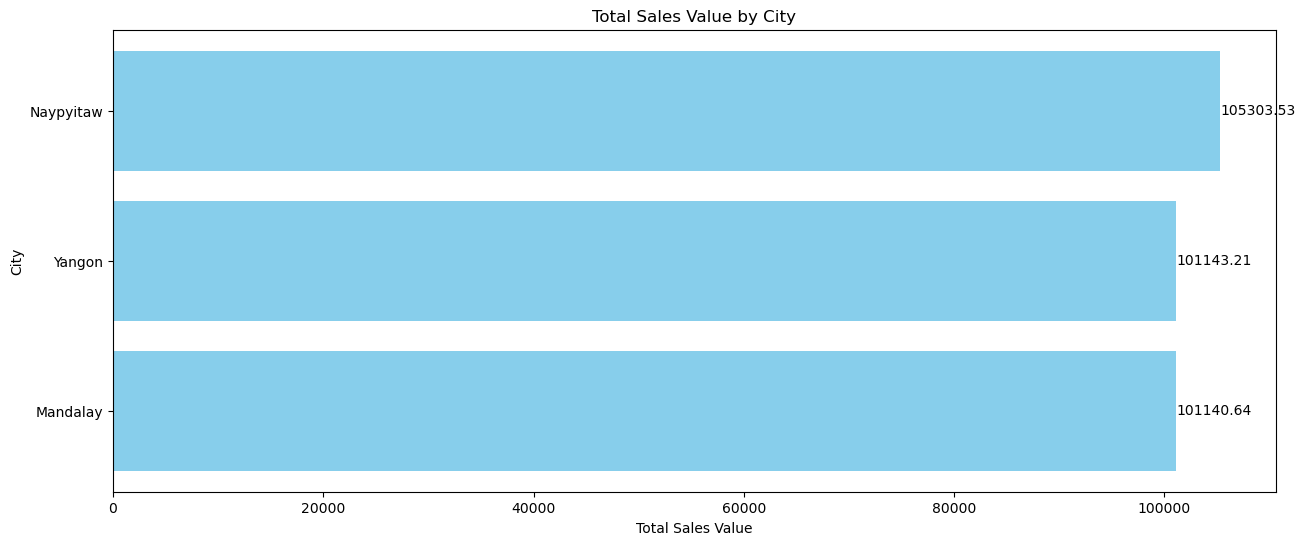

In [59]:


# Group by 'Product line' and sum 'Total Value'
grouped_data = df.groupby('City')['Total Value'].sum().sort_values()

# Plot horizontal bar chart
plt.figure(figsize=(15, 6))
plt.barh(grouped_data.index, grouped_data.values, color='skyblue')

# Add value labels next to the bars
for index, value in enumerate(grouped_data.values):
    plt.text(value, index, f'{value:.2f}', va='center')

plt.xlabel('Total Sales Value')
plt.ylabel('City')
plt.title('Total Sales Value by City')
plt.show()

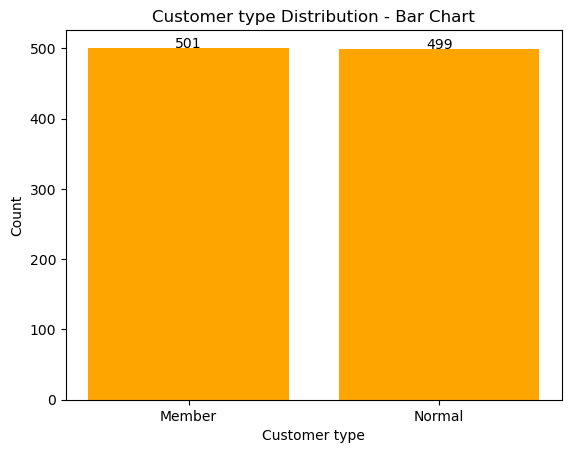

In [63]:
Customertype_counts = df['Customer type'].value_counts()
plt.bar(Customertype_counts.index, Customertype_counts, color='orange')
for index, value in enumerate(Customertype_counts):
    plt.text(index, value + 0.5, str(value), ha='center')
plt.title('Customer type Distribution - Bar Chart')
plt.xlabel('Customer type')
plt.ylabel('Count')
plt.show()